MD RAKIB AHSAN

> 2016331039



In [1]:
#2016331039
import numpy as np
import matplotlib.pyplot as plt
import math

# **DIGITAL-TO-ANALOG CONVERSION**


> **Digital-to-analog conversion is the process of changing one of the characteristics of an analog signal based on the information in digital data**


> *Three meachanisms for modulating digital data into an analog signal:*



1.   Amplitude Shift Keying(ASK)

1.   Frequency Shift Keying(FSK)
2.   Phase Shift Keying(PSK)



> **$Unipolar$ - $NRZ$ Encoding**


> Given a sequence of bits and computes the $Unipolar$-$NRZ$ Encoding. Returns the encoded signal stream.

















In [2]:

def compute_Unipolar_NRZ_Encoding(bits, N, bit_rate, T, Time):
  '''
  bits      -      Digital data elements(input bits row vector)
  Time      -      Time period for sending 1 data elements
  bit_rate  -      Bit rate(the number of data elements(bits) sent in 1s)
  N         -      Bit Length of input bits
  T         -      Digital Signal per bit
  x         -      Unipolar_NRZ Line coding row vector(Digital Signal)
  t         -      Time vector for Digial Signal
  '''
  x = np.array([])
  for i in range(N):
    temp = bits[i]* np.ones((T))
    x = np.append(x, temp)
  t = np.linspace(0,N*Time,len(x))
  return [t, x]

def plot_signal(t, x):
  '''
  t - Time vector for a Signal
  x - Signal element
  '''
  plt.figure(figsize=(18, 6))
  plt.plot(t, x)
  plt.show()

# **Amplitude Shift Keying(ASK)**

> **The amplitude of the carrier signal is varied to create signal elements, While both frequency and phase remain constant.**

> **Binary ASK (BASK):**



> ASK is normally implemented using only two level of amplitude. This process known as Binary ASK(BASK).



> For $Unipolar$ - $NRZ$:

> Digital data are presented as digital signal with a high voltage of 1V and a low voltage of 0 V

---We use the first amplitude level if the data element is 0, and use the second amplitude level if the data element is 1


> The $BASK$ implementation for $Unipolar$ - $NRZ$ can be achieved in **two** ways:

1.   **Very Simple Implementation**


> The $BASK$ implementation can be achieved by multiplying the $NRZ$ digital signal by the carrier signal coming from an oscillator. The same amplitude is used for 0 and 1.

> When the amplitude of the $NRZ$ signal is 1, the amplitude of the carrier frequency is held. And, when the amplitude of the $NRZ$ signal is 0, the amplitude of the carrier frequency is zero.




2.   **Alternative Implementation**


> The $BASK$ implementation can be achieved by assigning one carrier signal with two types of amplitudes for two levels. One amplitude for 1 and another amplitude for 0.

**Very Simple $BASK$ Implementation ($Unipolar$ - $NRZ$)**

> Step 1: $Unipolar$ - $NRZ$ Encoding





























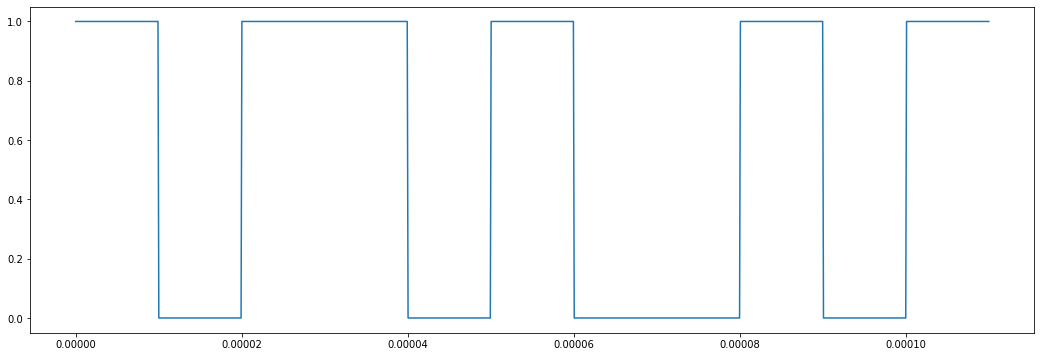

In [3]:
bits = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1]) 
Time = 10e-6   
bit_rate = 1/Time 
N = len(bits)   
T = 100
t,x = compute_Unipolar_NRZ_Encoding(bits, N, bit_rate, T, Time)
# x - Unipolar-NRZ encoded signal
plot_signal(t, x)

**Step 2: Creating a Carrier signal**

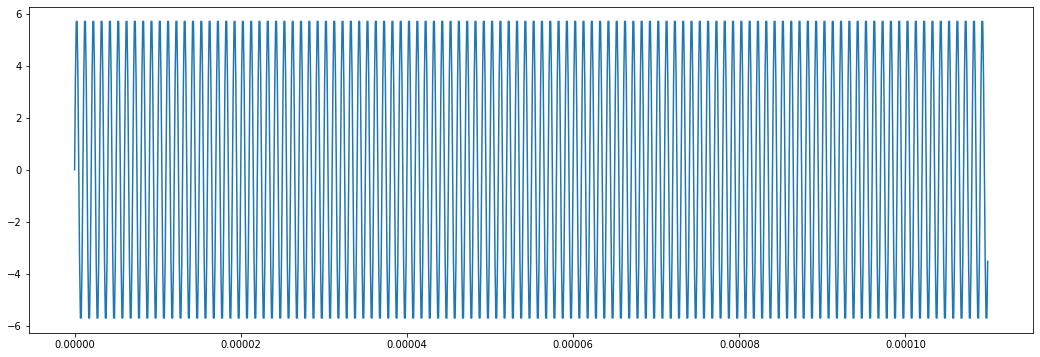

In [4]:
Ac = 6                         
fc =round(10*bit_rate)
tc = np.arange(0,N*Time,Time/T)
xc = Ac * np.sin(2.0 * np.pi * fc * tc)
# xc - Carrier signal
plot_signal(tc, xc)

**Step 3: Multiplying NRZ digital signal by the carrier signal**


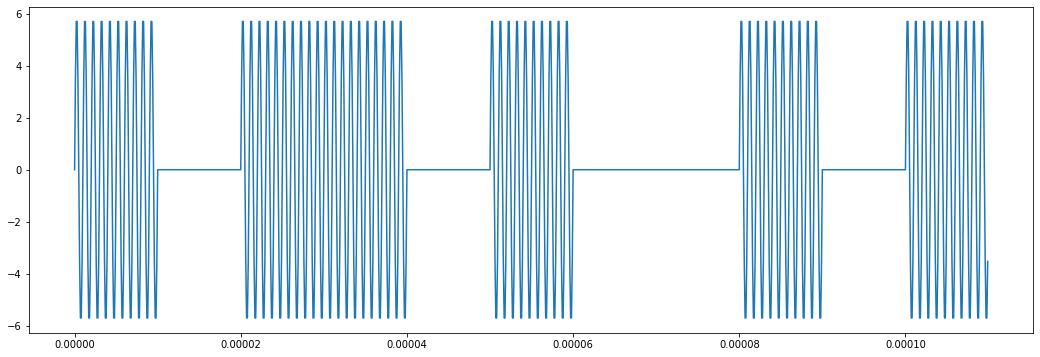

In [5]:
modulated_signal = x * xc
plot_signal(tc, modulated_signal)

**Alternative $BASK$ Implementation ($Unipolar$ - $NRZ$)**

> **Step 1: $Unipolar$ - $NRZ$ Encoding**



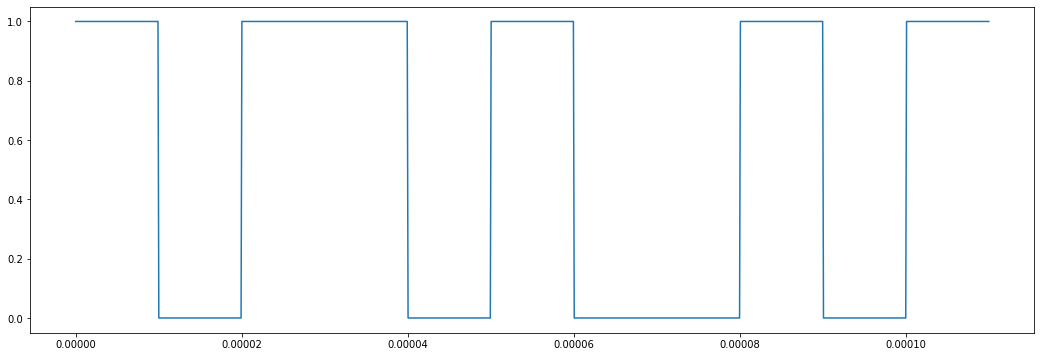

In [6]:
bits = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1]) 
Time = 10e-6   
bit_rate = 1/Time 
N = len(bits)   
T = 100
t,x = compute_Unipolar_NRZ_Encoding(bits, N, bit_rate, T, Time)
# x - Unipolar-NRZ encoded signal
plot_signal(t, x)

**Step 2: Assigning one carrier signal with two types of amplitudes for two levels.**

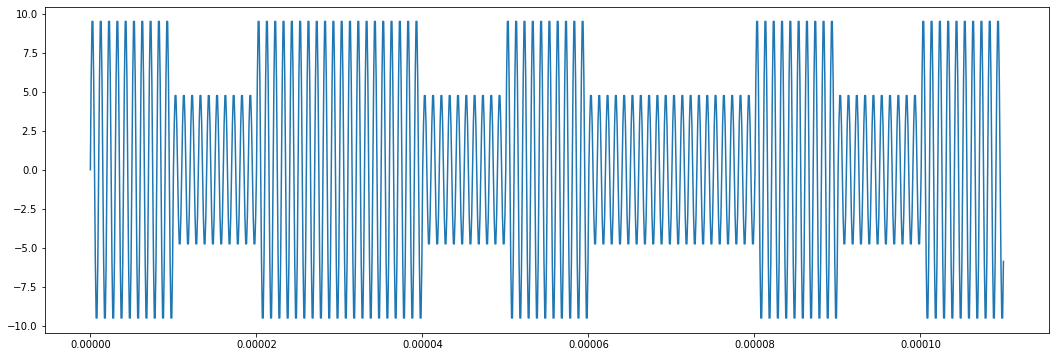

In [7]:
A1 = 10
A2 = 5                         
fc =round(10*bit_rate)
tc = np.arange(0, Time, Time/T)
ask_modulated_signal = np.array([])
for i in range(N):
  if bits[i] == 1:
    sig = A1 * np.sin(2.0 * np.pi * fc * tc)
    ask_modulated_signal = np.append(ask_modulated_signal, sig)
  else:
    sig = A2 * np.sin(2.0 * np.pi * fc * tc)
    ask_modulated_signal = np.append(ask_modulated_signal, sig)
  
# ask_modulated_signal - ASK Modulated signal
plot_signal(t, ask_modulated_signal)

# **Frequency Shift Keying(FSK)**


> **The Frequency of the carrier signal is varied to create signal elements, While both amplitude and phase remain constant.**


> **Binary FSK (BFSK):**

> FSK is normally implemented using two carrier frequencies. This process known as Binary FSK(BFSK)

> For $Unipolar$ - $NRZ$:

> Digital data are presented as digital signal with a high voltage of 1V and a low voltage of 0 V

---We use the first carrier frequency if the data element is 0, and use the second carrier frequency if the data element is 1


> The $BFSK$ implementation for $Unipolar$ - $NRZ$ can be achieved in the following way:

> When the amplitude of the $NRZ$ signal is 0, the oscillator keeps its regular frequency( or we can use different frequency) and when the amplitude of the $NRZ$ signal is 1, the frequency is increased.


*   Amplitude of the $NRZ$ signal is 0, use the first frequency(or keep the regular frequency)
*   Amplitude of the $NRZ$ signal is 1, use the second frequency.

> Step 1: $Unipolar$ - $NRZ$ Encoding





















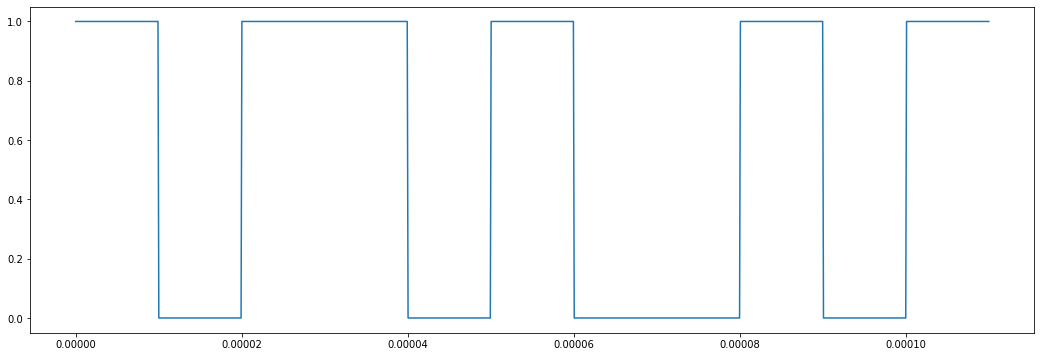

In [8]:
bits = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1]) 
Time = 10e-6   
bit_rate = 1/Time 
N = len(bits)   
T = 100
t,x = compute_Unipolar_NRZ_Encoding(bits, N, bit_rate, T, Time)
# x - Unipolar-NRZ encoded signal
plot_signal(t, x)


**Step 2: Assigning one carrier signal with two types of frequencies for two levels.**

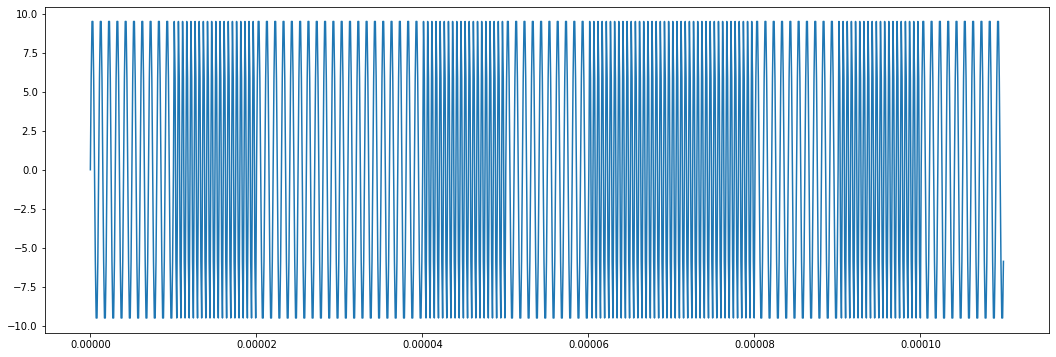

In [9]:
A = 10                       
fc1 =round(10*bit_rate)
fc2 =round(20*bit_rate)
tc = np.arange(0, Time, Time/T)
fsk_modulated_signal = np.array([])
for i in range(N):
  if bits[i] == 1:
    sig = A * np.sin(2.0 * np.pi * fc1 * tc)
    fsk_modulated_signal = np.append(fsk_modulated_signal, sig)
  else:
    sig = A * np.sin(2.0 * np.pi * fc2 * tc)
    fsk_modulated_signal = np.append(fsk_modulated_signal, sig)
  
# fsk_modulated_signal - FSK Modulated signal
plot_signal(t, fsk_modulated_signal)

# **Phase Shift Keying(PSK)**

> The Phase of the carrier signal is varied to create signal elements, While both amplitude and frequency remain constant.


> Binary PSK (BPSK):

> PSK is normally implemented using only two phases. This process known as Binary PSK(BPSK)

> For $Unipolar$ - $NRZ$:

> Digital data are presented as digital signal with a high voltage of 1V and a low voltage of 0 V

*   We use the first phase frequency if the data element is 1(usually used 0 degree phase), and use the second phase if the data element is 0(usually used 180 degree phase)


> The $BPSK$ implementation for $Unipolar$ - $NRZ$ can be achieved in the following way:

*   Amplitude of the $NRZ$ signal is 0, use the first phase(usualy uses 180 degree phase)
*   Amplitude of the $NRZ$ signal is 1, use the second phase(usually uses 0 degree phase).

> **Step 1: $Unipolar$ - $NRZ$ Encoding**





















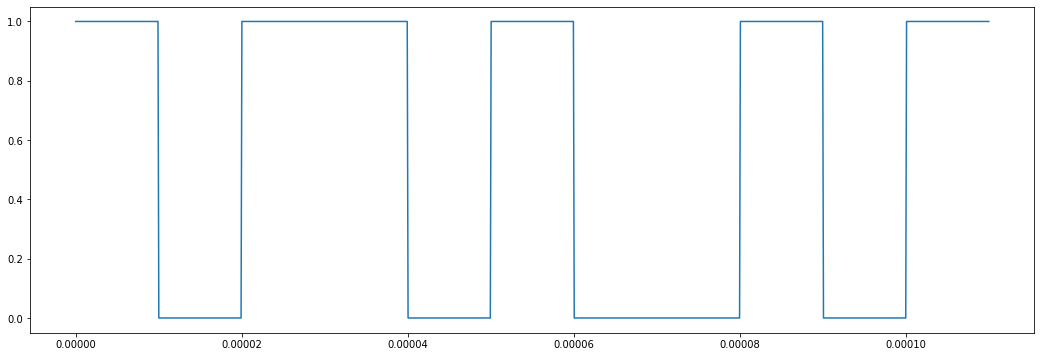

In [10]:
bits = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1]) 
Time = 10e-6   
bit_rate = 1/Time 
N = len(bits)   
T = 100
t,x = compute_Unipolar_NRZ_Encoding(bits, N, bit_rate, T, Time)
# x - Unipolar-NRZ encoded signal
plot_signal(t, x)

**Step 2: Assigning one carrier signal with two types of phases for two levels.**

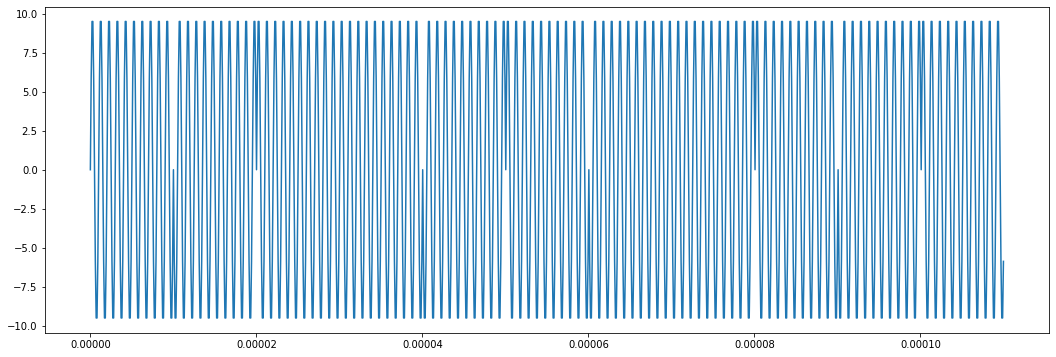

In [11]:
A = 10                      
fc =round(10*bit_rate)
ph1 = 0
ph2 = np.pi
tc = np.arange(0, Time, Time/T)
psk_modulated_signal = np.array([])
for i in range(N):
  if bits[i] == 1:
    sig = A * np.sin((2.0 * np.pi * fc * tc) + ph1)
    psk_modulated_signal = np.append(psk_modulated_signal, sig)
  else:
    sig = A * np.sin((2.0 * np.pi * fc * tc) + ph2)
    psk_modulated_signal = np.append(psk_modulated_signal, sig)
  
# psk_modulated_signal - PSK Modulated signal
plot_signal(t, psk_modulated_signal)

**GOOD BYE**